# Hotel Booking Cancellation Prediction

------------------------------------------------------------------------------------------------------------------------------

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
pwd

'C:\\Users\\gohil\\Desktop\\GOAL\\FINGERTIPS\\4. MACHINE LEARNING\\PROJECTS\\Python Project 9 Random Forest Classification - Prospect_Hotel_Booking_Cancellation'

### Load the data

In [3]:
df = pd.read_csv("Hotel_Booking_Cancellation_Prediction.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
df.shape

(119390, 32)

In [7]:
#Print the unique values in all columns
for col in df.columns:
    print(col + " =", df[col].unique())

hotel = ['Resort Hotel' 'City Hotel']
is_canceled = [0 1]
lead_time = [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 2

reservation_status_date = ['01/07/2015' '02/07/2015' '03/07/2015' '06/05/2015' '22/04/2015'
 '23/06/2015' '05/07/2015' '06/07/2015' '07/07/2015' '08/07/2015'
 '11/05/2015' '15/07/2015' '16/07/2015' '29/05/2015' '19/05/2015'
 '19/06/2015' '23/05/2015' '18/05/2015' '09/07/2015' '02/06/2015'
 '13/07/2015' '04/07/2015' '29/06/2015' '16/06/2015' '18/06/2015'
 '12/06/2015' '09/06/2015' '26/05/2015' '11/07/2015' '12/07/2015'
 '17/07/2015' '15/04/2015' '13/05/2015' '10/07/2015' '20/05/2015'
 '12/05/2015' '14/07/2015' '17/06/2015' '01/05/2015' '30/03/2015'
 '19/07/2015' '03/06/2015' '26/06/2015' '14/05/2015' '20/07/2015'
 '07/05/2015' '28/05/2015' '13/04/2015' '25/03/2015' '21/07/2015'
 '27/06/2015' '18/07/2015' '23/07/2015' '08/06/2015' '22/06/2015'
 '24/06/2015' '05/03/2015' '01/06/2015' '24/04/2015' '22/07/2015'
 '27/05/2015' '06/04/2015' '11/04/2015' '25/07/2015' '28/07/2015'
 '29/07/2015' '25/06/2015' '24/07/2015' '05/06/2015' '30/06/2015'
 '13/06/2015' '11/06/2015' '30/07/2015' '27/07/201

In [8]:
df.drop("company", axis=1, inplace=True)

In [9]:
# Fill nan value in country with ‘other’
df['country'] = df['country'].replace(np.nan, 'Others')

In [10]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                               0
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             16340
days_in_waiting_list                  0


In [11]:
df["agent"] = df["agent"].fillna(df["agent"].mean())

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

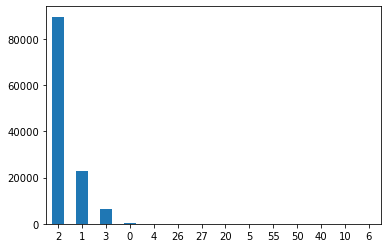

In [13]:
#Plot the count of adult and children with help of a bar plot
df['adults'].value_counts().plot(kind = 'bar');
plt.xticks(rotation=0);

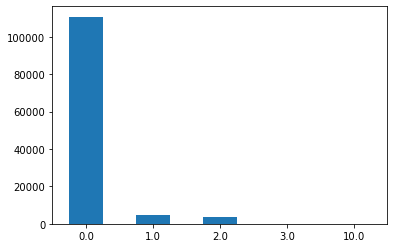

In [14]:
df['children'].value_counts().plot(kind = 'bar');
plt.xticks(rotation=0);

In [15]:
pd.set_option('display.max_columns', None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,86.693382,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,86.693382,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,86.693382,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.000000,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.000000,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [16]:
df.drop("reservation_status_date", axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [18]:
df = df.dropna()

In [19]:
df.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
days_in_waiting_list              False


### Perform Label encoding on categorical columns

In [20]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

df["hotel"] = labelencoder.fit_transform(df["hotel"])
df["arrival_date_month"] = labelencoder.fit_transform(df["arrival_date_month"])
df["meal"] = labelencoder.fit_transform(df["meal"])
df["country"] = labelencoder.fit_transform(df["country"])
df["market_segment"] = labelencoder.fit_transform(df["market_segment"])
df["distribution_channel"] = labelencoder.fit_transform(df["distribution_channel"])
df["reserved_room_type"] = labelencoder.fit_transform(df["reserved_room_type"])
df["assigned_room_type"] = labelencoder.fit_transform(df["assigned_room_type"])
df["deposit_type"] = labelencoder.fit_transform(df["deposit_type"])
df["customer_type"] = labelencoder.fit_transform(df["customer_type"])
df["reservation_status"] = labelencoder.fit_transform(df["reservation_status"])

In [21]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,1,0,342,2015,5,27,1,0,0,2,0.0,0,0,136,3,1,0,0,0,2,2,3,0,86.693382,0,2,0.0,0,0,1
1,1,0,737,2015,5,27,1,0,0,2,0.0,0,0,136,3,1,0,0,0,2,2,4,0,86.693382,0,2,0.0,0,0,1
2,1,0,7,2015,5,27,1,0,1,1,0.0,0,0,59,3,1,0,0,0,0,2,0,0,86.693382,0,2,75.0,0,0,1
3,1,0,13,2015,5,27,1,0,1,1,0.0,0,0,59,2,0,0,0,0,0,0,0,0,304.000000,0,2,75.0,0,0,1
4,1,0,14,2015,5,27,1,0,2,2,0.0,0,0,59,6,3,0,0,0,0,0,0,0,240.000000,0,2,98.0,0,1,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119386 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119386 non-null  int32  
 1   is_canceled                     119386 non-null  int64  
 2   lead_time                       119386 non-null  int64  
 3   arrival_date_year               119386 non-null  int64  
 4   arrival_date_month              119386 non-null  int32  
 5   arrival_date_week_number        119386 non-null  int64  
 6   arrival_date_day_of_month       119386 non-null  int64  
 7   stays_in_weekend_nights         119386 non-null  int64  
 8   stays_in_week_nights            119386 non-null  int64  
 9   adults                          119386 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119386 non-null  int64  
 12  meal            

### Create features and target data

In [67]:
X = df.drop("is_canceled", axis=1)
Y = df.is_canceled

### Split into training & testing sets

In [68]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [69]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(95508, 29) (95508,) (23878, 29) (23878,)


### Apply Random forest classifier on data

In [70]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)

RandomForestClassifier()

In [71]:
print("Training Accuracy:", rfc.score(X_train,Y_train))
print("Testing Accuracy:", rfc.score(X_test, Y_test)) 

Training Accuracy: 1.0
Testing Accuracy: 1.0


In [72]:
#Let's predict out X_test data
Y_pred = rfc.predict(X_test)

In [73]:
# Comparison between Predicted values and Actual values
comparison = pd.DataFrame(list(zip(Y_test, Y_pred)),
               columns =['Actual', 'Predicted'])
comparison[:10]

,Actual,Predicted
0,0,0
1,1,1
2,0,0
3,1,1
4,0,0
5,0,0
6,1,1
7,1,1
8,0,0
9,0,0


In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
# A function to display precision score, recall score, accuracy, classification report, confusion matrix, F1 Score.

def evaluate_preds(Y_test, Y_pred):
    """
    Performs evaluation comparison on y_true labels vs. y_preds labels on a classification.
    """
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    class_report = classification_report(Y_test, Y_pred)
    metrics_dict = {"accuracy:": round(accuracy, 2),
                    "precision:": round(precision, 2),
                    "recall:": round(recall, 2),
                    "f1:": round(f1, 2),}
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    print("\n")
    print(f"Confusion matrix:\n{conf_matrix}");
    print("\n")
    print(f"Classification Report:\n{class_report}");
    
    return metrics_dict

In [76]:
evaluate_preds(Y_test, Y_pred)

Accuracy: 100.00%
precision: 1.00
Recall: 1.00
F1 score: 1.00


Confusion matrix:
[[14973     0]
 [    0  8905]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14973
           1       1.00      1.00      1.00      8905

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



{'accuracy:': 1.0, 'precision:': 1.0, 'recall:': 1.0, 'f1:': 1.0}